# Ignasius Ferry Priguna - 16520243 - ITB

# Tanggal mulai pengerjaan : 11 November 2020

# Sumber Dataset : https://data.jakarta.go.id/dataset/data-status-akreditasi-satuan-pendidikan

In [102]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# Read dataset
data = pd.read_csv("/content/dataset_akreditasi_LP_DKI_Jakarta.csv")

# Data Preprocessing

### Data Cleaning

In [104]:
# Menghapus kolom alamat
data = data.iloc[:, [1, 2, 4, 5]]

In [105]:
# Menghapus data lembaga pendidikan yang tidak lengkap (tidak ada keterangan akreditasi atau kecamatan)
data = data.drop(data[pd.isna(data.akreditasi)].index)
data = data.drop(data[pd.isna(data.kecamatan)].index)

In [106]:
# Menghilangkan spasi yang tidak diinginkan pada kolom kecamatan
def removeUnwantedSpace(st):
  for i in range(len(st) - 2):
    if st[i] == " " and st[i+2] == " ":
      return st.replace(" ", "")
  return st
data["kecamatan"] = data['kecamatan'].apply(removeUnwantedSpace)

### Data Preparation

In [107]:
data_scoring = data

In [108]:
# Mengkonversi data akreditasi dari bentuk huruf menjadi angka
def letterToScore(letter):
  if letter == "A":
    return 3
  elif letter == "B":
    return 2
  elif letter == "C":
    return 1

data_scoring = data.drop(data[data.akreditasi == "Tidak Terakreditasi"].index)
data_scoring["akreditasi"] = data_scoring["akreditasi"].apply(letterToScore)

# Model Development

In [110]:
data_scoring_kecamatan = data_scoring.iloc[:, [1, 3]]

### Data Akreditasi Per Kecamatan di DKI Jakarta

In [111]:
kecamatan_akred_dict = {}
for ind in data.index: 
    if data['kecamatan'][ind] not in kecamatan_akred_dict:
      kecamatan_akred_dict[data['kecamatan'][ind]] = [0, 0, 0, 0]
    if data['akreditasi'][ind] == "A":
      kecamatan_akred_dict[data['kecamatan'][ind]][0] += 1
    elif data['akreditasi'][ind] == "B":
      kecamatan_akred_dict[data['kecamatan'][ind]][1] += 1
    elif data['akreditasi'][ind] == "C":
      kecamatan_akred_dict[data['kecamatan'][ind]][2] += 1
    elif data['akreditasi'][ind] == "Tidak Terakreditasi":
      kecamatan_akred_dict[data['kecamatan'][ind]][3] += 1
kecamatan_akred_data = pd.DataFrame.from_dict(kecamatan_akred_dict, orient = 'index', columns = ['A', 'B', 'C', 'Tidak Terakreditasi'])
kecamatan_akred_data.head()

,A,B,C,Tidak Terakreditasi
Kebayoran Lama,116,48,3,86
Grogol Petamburan,98,47,3,30
Setia Budi,41,35,2,4
Cengkareng,148,101,4,76
Jagakarsa,112,44,1,62


### Data Kecamatan Berdasarkan Poin Akreditasi ( A : 3, B : 2, C : 1)

In [112]:
kecamatan_poin_dict = {}
for ind in data_scoring_kecamatan.index: 
    if data_scoring_kecamatan['kecamatan'][ind] not in kecamatan_poin_dict:
      kecamatan_poin_dict[data_scoring_kecamatan['kecamatan'][ind]] = data_scoring_kecamatan['akreditasi'][ind]
    else:
      kecamatan_poin_dict[data_scoring_kecamatan['kecamatan'][ind]] += data_scoring_kecamatan['akreditasi'][ind]
kecamatan_poin_data = pd.DataFrame.from_dict(kecamatan_poin_dict, orient = 'index', columns = ["Total Poin"])

### Data Kecamatan Berdasarkan Jumlah Lembaga Pendidikan Terakreditasi

In [113]:
kecamatan_jumlah_dict = {}
for ind in data_scoring_kecamatan.index: 
    if data_scoring_kecamatan['kecamatan'][ind] not in kecamatan_jumlah_dict:
      kecamatan_jumlah_dict[data_scoring_kecamatan['kecamatan'][ind]] = 1
    else:
      kecamatan_jumlah_dict[data_scoring_kecamatan['kecamatan'][ind]] += 1
kecamatan_jumlah_data = pd.DataFrame.from_dict(kecamatan_jumlah_dict, orient = 'index', columns = ["Jumlah Lembaga Pendidikan Terakreditasi"])
kecamatan_jumlah_data.head()

,Jumlah Lembaga Pendidikan Terakreditasi
Kebayoran Lama,167
Pulo Gadung,198
Senen,84
Kebayoran Baru,116
Jagakarsa,157


### Data Kecamatan Berdasarkan Jumlah Lembaga Pendidikan

In [114]:
kecamatan_jumlaht_dict = {}
for ind in data_scoring_kecamatan.index: 
  kecamatan_jumlaht_dict[data['kecamatan'][ind]] = sum(kecamatan_akred_dict[data['kecamatan'][ind]])
kecamatan_jumlaht_data = pd.DataFrame.from_dict(kecamatan_jumlaht_dict, orient = 'index', columns = ["Jumlah Lembaga Pendidikan"])
kecamatan_jumlaht_data.head()

,Jumlah Lembaga Pendidikan
Kebayoran Lama,253
Pulo Gadung,221
Senen,92
Kebayoran Baru,135
Jagakarsa,219


### Data Kecamatan Berdasarkan Jumlah Lembaga Pendidikan Berakreditasi A

In [115]:
kecamatan_jumlah_A_dict = {}
for ind in data_scoring_kecamatan.index: 
    if data_scoring_kecamatan['kecamatan'][ind] not in kecamatan_jumlah_A_dict:
      kecamatan_jumlah_A_dict[data_scoring_kecamatan['kecamatan'][ind]] = 0
    if data_scoring_kecamatan['kecamatan'][ind] in kecamatan_jumlah_A_dict and data_scoring_kecamatan['akreditasi'][ind] == 3:
      kecamatan_jumlah_A_dict[data_scoring_kecamatan['kecamatan'][ind]] += 1
kecamatan_jumlah_A_data = pd.DataFrame.from_dict(kecamatan_jumlah_A_dict, orient = 'index', columns = ["Jumlah Lembaga Pendidikan Berakreditasi A"])
kecamatan_jumlah_A_data.head()

,Jumlah Lembaga Pendidikan Berakreditasi A
Kebayoran Lama,116
Pulo Gadung,103
Senen,51
Kebayoran Baru,90
Jagakarsa,112


### Data Kecamatan Berdasarkan Rata-Rata Poin

In [116]:
kecamatan_avg_dict = {}
for ind in data_scoring_kecamatan.index: 
  avg = kecamatan_poin_dict[data_scoring_kecamatan['kecamatan'][ind]] / kecamatan_jumlah_dict[data_scoring_kecamatan['kecamatan'][ind]]
  if avg == 3:
    kecamatan_avg_dict[data_scoring_kecamatan['kecamatan'][ind]] = ["A", avg]
  elif avg > 2:
    kecamatan_avg_dict[data_scoring_kecamatan['kecamatan'][ind]] = ["A-B", avg]
  elif avg == 2:
    kecamatan_avg_dict[data_scoring_kecamatan['kecamatan'][ind]] = ["B", avg]
  elif avg > 1:
    kecamatan_avg_dict[data_scoring_kecamatan['kecamatan'][ind]] = ["B-C", avg]
  else:
    kecamatan_avg_dict[data_scoring_kecamatan['kecamatan'][ind]] = ["C", avg]
kecamatan_avg_data = pd.DataFrame.from_dict(kecamatan_avg_dict, orient = 'index', columns = ["Rentang Akreditasi", "Rata-rata Poin"])
kecamatan_avg_data.head()

,Rentang Akreditasi,Rata-rata Poin
Kebayoran Lama,A-B,2.676647
Pulo Gadung,A-B,2.459596
Senen,A-B,2.559524
Kebayoran Baru,A-B,2.758621
Jagakarsa,A-B,2.707006


# Data Persentase Lembaga Pendidikan berakreditasi A

In [117]:
kecamatan_pct_dict = {}
for ind in data_scoring_kecamatan.index: 
  pct = kecamatan_jumlah_A_dict[data_scoring_kecamatan['kecamatan'][ind]] / kecamatan_jumlaht_dict[data_scoring_kecamatan['kecamatan'][ind]] * 100
  kecamatan_pct_dict[data_scoring_kecamatan['kecamatan'][ind]] = pct
kecamatan_pct_data = pd.DataFrame.from_dict(kecamatan_pct_dict, orient = 'index', columns = ["Persentase Akreditasi A"])
kecamatan_pct_data.head()

,Persentase Akreditasi A
Kebayoran Lama,45.849802
Pulo Gadung,46.606335
Senen,55.434783
Kebayoran Baru,66.666667
Jagakarsa,51.141553


# Presentation (Dalam Bentuk Grafik dan Data yang sudah Diproses)

### Grafik Jumlah Lembaga Pendidikan

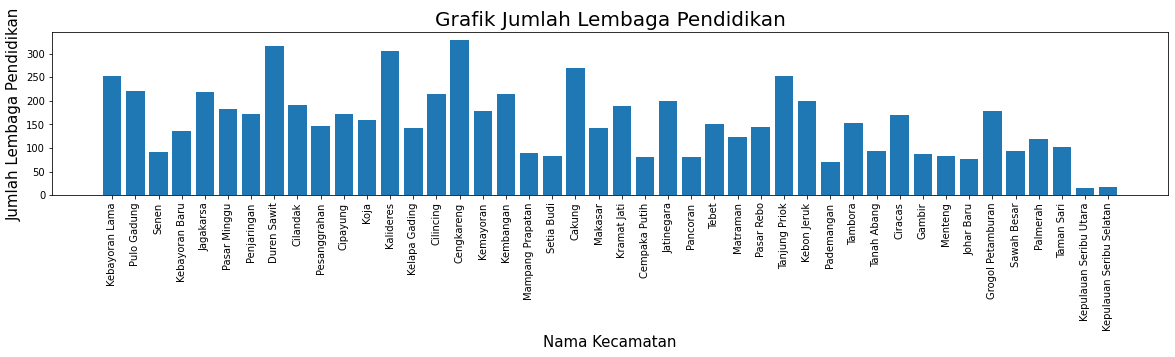

In [118]:
x = kecamatan_jumlaht_data.index
y = kecamatan_jumlaht_data["Jumlah Lembaga Pendidikan"]

plt.figure(figsize=(20, 3))
plt.xticks(rotation='vertical')
plt.title("Grafik Jumlah Lembaga Pendidikan", fontsize = 20)
plt.xlabel("Nama Kecamatan", fontsize=15)
plt.ylabel("Jumlah Lembaga Pendidikan", fontsize=15)

plt.bar(x,y)
plt.show()

### Grafik Rata-Rata Poin Akreditasi

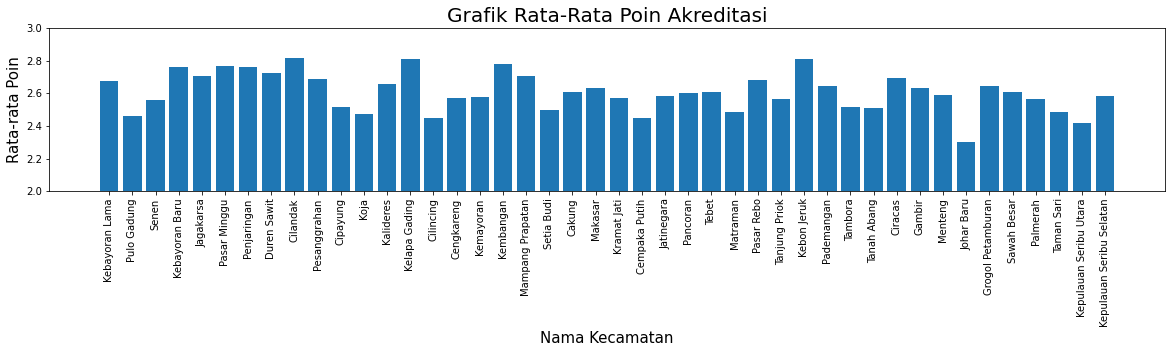

In [119]:
x = kecamatan_avg_data.index
y = kecamatan_avg_data["Rata-rata Poin"]

plt.figure(figsize=(20, 3))
plt.xticks(rotation='vertical')
plt.title("Grafik Rata-Rata Poin Akreditasi", fontsize = 20)
plt.xlabel("Nama Kecamatan", fontsize=15)
plt.ylabel("Rata-rata Poin", fontsize=15)
plt.gca().set_ylim([2,3])

plt.bar(x,y)
plt.show()

### Grafik Persentase Lembaga Pendidikan Berakreditasi A

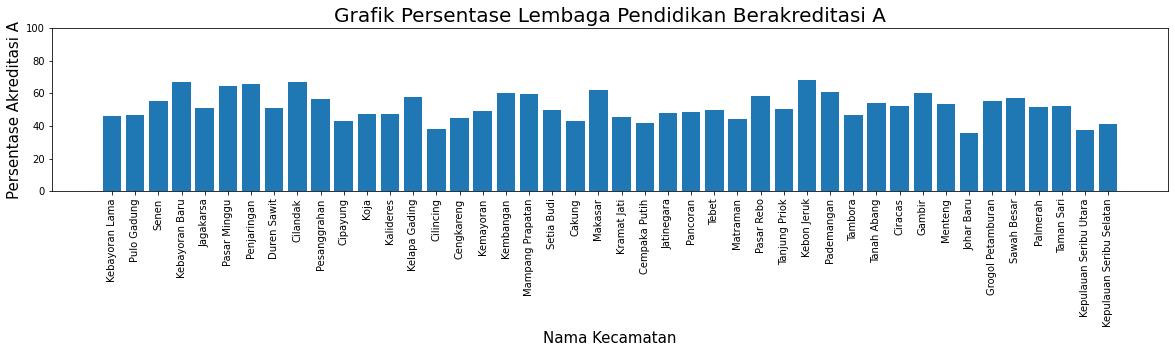

In [120]:
x = kecamatan_pct_data.index
y = kecamatan_pct_data["Persentase Akreditasi A"]

plt.figure(figsize=(20, 3))
plt.xticks(rotation='vertical')
plt.title("Grafik Persentase Lembaga Pendidikan Berakreditasi A", fontsize = 20)
plt.xlabel("Nama Kecamatan", fontsize=15)
plt.ylabel("Persentase Akreditasi A", fontsize=15)
plt.gca().set_ylim([0,100])

plt.bar(x,y)
plt.show()

### Ringkasan Data

In [121]:
result = pd.concat([kecamatan_akred_data, kecamatan_jumlaht_data, kecamatan_pct_data, kecamatan_avg_data], axis = 1)
result


,A,B,C,Tidak Terakreditasi,Jumlah Lembaga Pendidikan,Persentase Akreditasi A,Rentang Akreditasi,Rata-rata Poin
Kebayoran Lama,116,48,3,86,253,45.849802,A-B,2.676647
Grogol Petamburan,98,47,3,30,178,55.056180,A-B,2.641892
Setia Budi,41,35,2,4,82,50.000000,A-B,2.500000
Cengkareng,148,101,4,76,329,44.984802,A-B,2.569170
Jagakarsa,112,44,1,62,219,51.141553,A-B,2.707006
Pulo Gadung,103,83,12,23,221,46.606335,A-B,2.459596
Penjaringan,112,28,3,28,171,65.497076,A-B,2.762238
Senen,51,29,4,8,92,55.434783,A-B,2.559524
Pasar Minggu,118,33,1,31,183,64.480874,A-B,2.769737
Kebayoran Baru,90,24,2,19,135,66.666667,A-B,2.758621


## Statistik Data

### Rata-rata Data

In [124]:
print("Rata-rata jumlah lembaga pendidikan per Kecamatan:" + str(sum(kecamatan_jumlaht_dict.values()) // 44))
avgsum = 0
for i in kecamatan_avg_dict.values():
  avgsum += i[1]
print("Rata-rata poin akreditasi lembaga pendidikan per Kecamatan:" + str(avgsum / 44))
print("Rata-rata persentase lembaga pendidikan berakreditasi A:" + str(sum(kecamatan_pct_dict.values()) / 44))

Rata-rata jumlah lembaga pendidikan per Kecamatan:156
Rata-rata poin akreditasi lembaga pendidikan per Kecamatan:2.6082764208376124
Rata-rata persentase lembaga pendidikan berakreditasi A:51.922736962237714


### Min Max Data

In [125]:
print("Minimum jumlah lembaga pendidikan per Kecamatan:" + str(result['Jumlah Lembaga Pendidikan'].min()))
print("Maksimum jumlah lembaga pendidikan per Kecamatan:" + str(result['Jumlah Lembaga Pendidikan'].max()))
print()
print("Minimum Rata-rata Poin akreditasi lembaga pendidikan per Kecamatan:" + str(result['Rata-rata Poin'].min()))
print("Maksimum Rata-rata Poin akreditasi lembaga pendidikan per Kecamatan:" + str(result['Rata-rata Poin'].max()))
print()
print("Minimum persentase lembaga pendidikan berakreditasi A:" + str(result['Persentase Akreditasi A'].min()))
print("Maksimum persentase lembaga pendidikan berakreditasi A:" + str(result['Persentase Akreditasi A'].max()))

Minimum jumlah lembaga pendidikan per Kecamatan:16
Maksimum jumlah lembaga pendidikan per Kecamatan:329

Minimum Rata-rata Poin akreditasi lembaga pendidikan per Kecamatan:2.3043478260869565
Maksimum Rata-rata Poin akreditasi lembaga pendidikan per Kecamatan:2.8152866242038215

Minimum persentase lembaga pendidikan berakreditasi A:35.526315789473685
Maksimum persentase lembaga pendidikan berakreditasi A:68.0


Insight yang didapat dari analisis data:


*   Seluruh Kecamatan di DKI Jakarta sudah memiliki beberapa lembaga pendidikan berakreditasi A.
*   Rata-rata lembaga pendidikan di DKI Jakarta memiliki akreditasi A atau B.
*   Rata-rata setiap Kecamatan di DKI Jakarta memiliki 156 lembaga pendidikan
*   Rata-rata poin akreditasi lembaga pendidikan setiap Kecamatan di DKI Jakarta adalah 2,608
*   Rata-rata persentase lembaga pendidikan berakreditasi A di setiap Kecamatan di DKI Jakarta adalah 51,923%
*   Cengkareng menyediakan pilihan lembaga pendidikan terbanyak yaitu sebanyak 329 lembaga.
*   Cilandak memiliki rata-rata poin akreditasi lembaga pendidikan tertinggi yaitu 2.815
*   Kebon Jeruk memiliki persentase lembaga pendidikan berakreditasi A tertinggi yaitu 68%



